### **Tag-Along code for Stage C Quiz**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [4]:
data = pd.read_csv("/content/Data_for_UCI_named.csv")

In [5]:
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
data = data.drop(columns=['stab']) #Drop the stab column

In [7]:
data.head() #Check first 5 rows

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [8]:
data.describe() #Check discriptive statistics before normalization

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


**Split data into features and output**

In [9]:
X = data.drop(columns = 'stabf') #Grab feature X
y = data['stabf'] #Grab output y

**Normalize the data**

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #Create a standard scaler object

In [11]:
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns) #Normalize the data

In [12]:
X_norm.describe() #Check discriptive statistics after normalization

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.799449e-16,-4.156675e-17,-6.945555e-17,-2.096101e-16,-3.222311e-16,-1.747935e-16,-1.485034e-16,-4.227729e-17,1.790568e-16,1.115552e-16,2.842171e-17,1.051603e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.731763e+00,-1.732001e+00,-1.731766e+00,-1.731874e+00,-2.881725e+00,-1.731796e+00,-1.731921e+00,-1.731879e+00,-1.732013e+00,-1.731859e+00,-1.731858e+00,-1.731949e+00
25%,-8.660657e-01,-8.659754e-01,-8.658369e-01,-8.660410e-01,-7.069329e-01,-8.657959e-01,-8.660829e-01,-8.659312e-01,-8.659453e-01,-8.658387e-01,-8.659778e-01,-8.660468e-01
50%,1.437170e-06,-7.205657e-06,-9.093304e-06,-9.588003e-05,1.363447e-03,7.890426e-05,5.874317e-05,-1.736395e-05,3.412676e-05,1.053324e-05,5.233896e-05,5.629163e-06
75%,8.659131e-01,8.659868e-01,8.660057e-01,8.659658e-01,7.078903e-01,8.660784e-01,8.659238e-01,8.658742e-01,8.657872e-01,8.659897e-01,8.658070e-01,8.657815e-01
max,1.731859e+00,1.731992e+00,1.731850e+00,1.731846e+00,2.811268e+00,1.731800e+00,1.731880e+00,1.731991e+00,1.731819e+00,1.731848e+00,1.731985e+00,1.731797e+00


In [13]:
y.value_counts() #Check class distribution

unstable    6380
stable      3620
Name: stabf, dtype: int64

**Train-Test Split**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y, test_size = 0.2, random_state = 1) #Split the data at 80-20

**Training a Random Forest Classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [18]:
rf_pred = rf_clf.predict(X_test)

**Training a Extra trees classiifier**

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
et_clf = ExtraTreesClassifier(random_state = 1)
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=1)

In [64]:
et_pred = et_clf.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=et_pred)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.9280


**Training a XGBoost Model**

In [23]:
# !pip install xgboost

In [24]:
from xgboost import XGBClassifier

In [25]:
xgb_clf = XGBClassifier(random_state=1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(random_state=1)

In [26]:
xgb_pred = xgb_clf.predict(X_test)

**Training a lightgbm Model**

In [27]:
from lightgbm import LGBMClassifier

In [28]:
lgbm_clf = LGBMClassifier(random_state=1)
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(random_state=1)

In [ ]:
lgbm_pred = lgbm_clf.predict(X_test)

**14. What is the accuracy on the test set using the random forest classifier? In 4 decimal places.**

In [ ]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

In [ ]:
rf_pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=rf_pred)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.9290


**15. What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.**

In [ ]:
xgb_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=xgb_pred)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.9195


**16. What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.**

In [ ]:
lgbm_pred = lgbm_clf.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=lgbm_pred)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.9475


**17. Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?**

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [56]:
# define search parameters
parameters = {
    'n_estimators': [10, 20, 50, 100, 200, 500, 1000],
     'criterion': ['gini', 'entropy'],
      'max_depth': [1, 2, 5, 8, 13, 21, 34, None],
      'min_samples_split': [2, 5, 8, 13, 21, 34]
}


In [57]:
#Define the classiifier
et_clf = ExtraTreesClassifier( )

In [41]:
et_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [58]:
# define search
search = RandomizedSearchCV(et_clf, parameters, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, verbose = 1, random_state=1, )
# execute search
result = search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [59]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9027499999999999
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 34, 'max_depth': 13, 'criterion': 'entropy'}


**18. Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?**

In [65]:
et_clf = ExtraTreesClassifier(n_estimators = 500, min_samples_split = 34,max_depth = 13, criterion = 'entropy',random_state = 1)
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=13, min_samples_split=34,
                     n_estimators=500, random_state=1)

In [66]:
et_pred = et_clf.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=et_pred)
print(f'accuracy: {accuracy:.4f}')

accuracy: 0.9120


Answer: The new accuracy was lower than the old one

**20. Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?**

In [ ]:
et_clf = ExtraTreesClassifier(random_state = 1)
et_clf.fit(X_train, y_train)

In [67]:
# Computing the importance of each feature
feature_importance = et_clf.feature_importances_

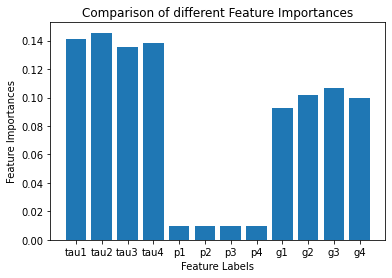

In [68]:
# Plotting a Bar Graph to compare the models
plt.bar(X_train.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

**Most Important: tau2**

**least Important: p1**